In [ ]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/OnlineRetail.csv" , encoding="Unicode Escape")

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
# Converting InvocieData into exact DateTime
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
data.duplicated(subset=["CustomerID", "Country"]).value_counts()

True     537520
False      4389
dtype: int64

In [ ]:
data.shape

(541909, 8)

In [ ]:
# Dropping duplicates to improve efficiency!
country_customer_data = data[["CustomerID", "Country"]].drop_duplicates()

In [ ]:
#After removing duplicated values from customerID and Country
country_customer_data.head(10)

,CustomerID,Country
0,17850.0,United Kingdom
9,13047.0,United Kingdom
26,12583.0,France
46,13748.0,United Kingdom
65,15100.0,United Kingdom
82,15291.0,United Kingdom
86,14688.0,United Kingdom
105,17809.0,United Kingdom
106,15311.0,United Kingdom
141,14527.0,United Kingdom


In [ ]:
#Displaying the top 7 countries unique values
country_customer_data["Country"].value_counts()[:10]

United Kingdom    3951
Germany             95
France              88
Spain               31
Belgium             25
Switzerland         22
Portugal            20
Italy               15
Finland             12
Austria             11
Name: Country, dtype: int64

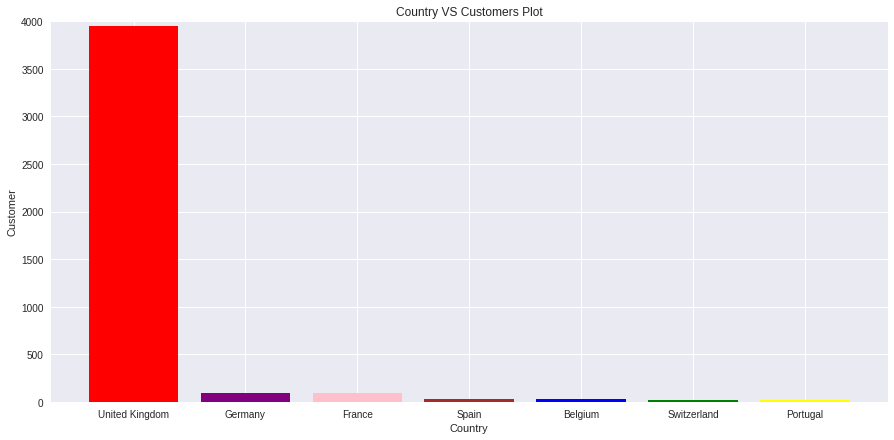

In [ ]:
# Plotting top 7 Customers Data

co = ["Red", "Purple","Pink","Brown","Blue", "Green", "Yellow"]

plt.style.use("seaborn")

fig, ax = plt.subplots(figsize = (15,7))

ax.bar(country_customer_data["Country"].value_counts()[:7].index,
       country_customer_data["Country"].value_counts()[:7],
       color = co
          )

ax.set(title = "Country VS Customers Plot",
       xlabel = "Country",
       ylabel = "Customer",
       ylim = (0,4000))


plt.show()

In [ ]:
#checking the minimum values of each column respectively
data.min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


InvoiceNo                   536365
StockCode                    10002
Quantity                    -80995
InvoiceDate    2010-12-01 08:26:00
UnitPrice                -11062.06
CustomerID                 12346.0
Country                  Australia
dtype: object

In [ ]:
# Filtering data for the country having the maximum customers
filtered_data = data[data["Country"] == "United Kingdom"]

In [ ]:
filtered_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
# Removing negative quantity value
filtered_data = filtered_data[filtered_data["Quantity"] >= 0 ]

In [ ]:
# Removing the negative values of unit price
filtered_data = filtered_data[filtered_data["UnitPrice"] > 0]

In [ ]:
print(filtered_data.InvoiceDate.min())
print(filtered_data.InvoiceDate.max())

2010-12-01 08:26:00
2011-12-09 12:49:00


In [ ]:
#Filtering the 9 Months data
customer_9m_data = filtered_data[(filtered_data.InvoiceDate <= dt(2011,12,10)) & (filtered_data.InvoiceDate >= dt(2010,1,12))]


In [ ]:
print(customer_9m_data.InvoiceDate.max()-customer_9m_data.InvoiceDate.min())

373 days 04:23:00


In [ ]:
customer_9m_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Filtering the required Columns
desired_columns_data = customer_9m_data.drop(["StockCode", "Description","Country"], axis = 1)

In [ ]:
desired_columns_data.shape

(485123, 5)

In [ ]:
desired_columns_data.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [ ]:
desired_columns_data.InvoiceDate.max()

Timestamp('2011-12-09 12:49:00')

In [ ]:
#calculating the total price through a product of unit price and quantity purchased

desired_columns_data['TotalPrice']=desired_columns_data['Quantity']*desired_columns_data['UnitPrice']

In [ ]:
desired_columns_data.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [ ]:
desired_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485123 entries, 0 to 541893
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    485123 non-null  object        
 1   Quantity     485123 non-null  int64         
 2   InvoiceDate  485123 non-null  datetime64[ns]
 3   UnitPrice    485123 non-null  float64       
 4   CustomerID   354321 non-null  float64       
 5   TotalPrice   485123 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 25.9+ MB


In [ ]:
#taken the date next to the last date as in order to calculate the recency
present_date=dt(2011,12,11)

In [ ]:
desired_columns_data.InvoiceDate.max()-desired_columns_data.InvoiceDate.min()

Timedelta('373 days 04:23:00')

In [ ]:
desired_columns_data.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


# Recency calculation

In [ ]:
#Fetching the max no of date of each customer
rfm=desired_columns_data.groupby('CustomerID').InvoiceDate.max().reset_index()

In [ ]:
rfm.head()

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:01:00
1,12747.0,2011-12-07 14:34:00
2,12748.0,2011-12-09 12:20:00
3,12749.0,2011-12-06 09:56:00
4,12820.0,2011-12-06 15:12:00


In [ ]:
#Changing the name of the columns
rfm.columns=['CustomerID','Last_purchase_date']

In [ ]:
rfm.head()

,CustomerID,Last_purchase_date
0,12346.0,2011-01-18 10:01:00
1,12747.0,2011-12-07 14:34:00
2,12748.0,2011-12-09 12:20:00
3,12749.0,2011-12-06 09:56:00
4,12820.0,2011-12-06 15:12:00


In [ ]:
#finding the recency
rfm['Recency']=(present_date-rfm['Last_purchase_date']).dt.days

In [ ]:
rfm.head()

,CustomerID,Last_purchase_date,Recency
0,12346.0,2011-01-18 10:01:00,326
1,12747.0,2011-12-07 14:34:00,3
2,12748.0,2011-12-09 12:20:00,1
3,12749.0,2011-12-06 09:56:00,4
4,12820.0,2011-12-06 15:12:00,4


In [ ]:
#dropping the column last_purchase_date
rfm=rfm.drop(['Last_purchase_date'],axis=1)

In [ ]:
rfm.head()

,CustomerID,Recency
0,12346.0,326
1,12747.0,3
2,12748.0,1
3,12749.0,4
4,12820.0,4


# Frequency calculation

In [ ]:
#calculation of the freq
freq = desired_columns_data.groupby('CustomerID').InvoiceNo.count().reset_index()

In [ ]:
#changing name of columns
freq.columns=['CustomerID','Frequency']

In [ ]:
freq.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,103
2,12748.0,4595
3,12749.0,199
4,12820.0,59


In [ ]:
#merging with rfm as to vsualize recency and freq together
rfm = pd.merge(rfm,freq, on='CustomerID')

In [ ]:
rfm.head()

,CustomerID,Recency,Frequency
0,12346.0,326,1
1,12747.0,3,103
2,12748.0,1,4595
3,12749.0,4,199
4,12820.0,4,59


# Monetary 

In [ ]:
#calculate Monetory value
mon=desired_columns_data.groupby('CustomerID').TotalPrice.sum().reset_index()

In [ ]:
mon.head()

,CustomerID,TotalPrice
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34


In [ ]:
#changing the columns name
mon.columns=['CustomerID','Monetary']

In [ ]:
mon.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34


In [ ]:
#merging monetory to rfm
rfm=pd.merge(rfm,mon,on='CustomerID')

In [ ]:
rfm.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,3,103,4196.01
2,12748.0,1,4595,33719.73
3,12749.0,4,199,4090.88
4,12820.0,4,59,942.34
5,12821.0,215,6,92.72
6,12822.0,71,46,948.88
7,12823.0,75,5,1759.50
8,12824.0,60,25,397.12
9,12826.0,3,91,1474.72


# Filtering out the top customers using RFM values

In [ ]:
#labels for discretion of the recency ,frequency and monetary
labels=['L','M','H']


In [ ]:
#discretion on recency
rfm['R_quartile'] = pd.qcut(rfm['Recency'], 3, labels)


In [ ]:
#discretion on Frequency
rfm['F_quartile'] = pd.qcut(rfm['Frequency'], 3, labels)

In [ ]:
#discretion on Monetary
rfm['M_quartile'] = pd.qcut(rfm['Monetary'], 3, labels)

In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,12346.0,326,1,77183.60,H,L,H
1,12747.0,3,103,4196.01,L,H,H
2,12748.0,1,4595,33719.73,L,H,H
3,12749.0,4,199,4090.88,L,H,H
4,12820.0,4,59,942.34,L,M,M


In [ ]:
#Merging all the rankings
rfm['Ranking'] = rfm.R_quartile.astype(str)+ rfm.F_quartile.astype(str) + rfm.M_quartile.astype(str)

In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,Ranking
0,12346.0,326,1,77183.60,H,L,H,HLH
1,12747.0,3,103,4196.01,L,H,H,LHH
2,12748.0,1,4595,33719.73,L,H,H,LHH
3,12749.0,4,199,4090.88,L,H,H,LHH
4,12820.0,4,59,942.34,L,M,M,LMM


In [ ]:
# Filtering out the customers having the least recency and high frequency and Monetary value
final_result=rfm[rfm['Ranking']=='LHH']

In [ ]:
final_result.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,Ranking
1,12747.0,3,103,4196.01,L,H,H,LHH
2,12748.0,1,4595,33719.73,L,H,H,LHH
3,12749.0,4,199,4090.88,L,H,H,LHH
9,12826.0,3,91,1474.72,L,H,H,LHH
21,12839.0,3,314,5591.42,L,H,H,LHH


In [ ]:
#filtering out the top customers
final_result=final_result.sort_values('Monetary',ascending=False).reset_index()

In [ ]:
final_result.head()

,index,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,Ranking
0,3783,18102.0,1,431,259657.30,L,H,H,LHH
1,3314,17450.0,9,337,194550.79,L,H,H,LHH
2,3356,17511.0,3,963,91062.38,L,H,H,LHH
3,2766,16684.0,5,277,66653.56,L,H,H,LHH
4,902,14096.0,5,5111,65164.79,L,H,H,LHH


In [ ]:
final_result=final_result.drop(['index'],axis=1)

In [ ]:
final_result.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,Ranking
0,18102.0,1,431,259657.30,L,H,H,LHH
1,17450.0,9,337,194550.79,L,H,H,LHH
2,17511.0,3,963,91062.38,L,H,H,LHH
3,16684.0,5,277,66653.56,L,H,H,LHH
4,14096.0,5,5111,65164.79,L,H,H,LHH


In [ ]:
#Our Top Customers
final_result.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,Ranking
0,18102.0,1,431,259657.30,L,H,H,LHH
1,17450.0,9,337,194550.79,L,H,H,LHH
2,17511.0,3,963,91062.38,L,H,H,LHH
3,16684.0,5,277,66653.56,L,H,H,LHH
4,14096.0,5,5111,65164.79,L,H,H,LHH


In [ ]:
#Displaying only the necessary data
final_result=final_result.drop(['R_quartile','F_quartile','M_quartile','Ranking'],axis=1)

In [ ]:
#Our top Customers
final_result.head()

,CustomerID,Recency,Frequency,Monetary
0,18102.0,1,431,259657.30
1,17450.0,9,337,194550.79
2,17511.0,3,963,91062.38
3,16684.0,5,277,66653.56
4,14096.0,5,5111,65164.79


# Prepearing data in order to fit into model

In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,Ranking
0,12346.0,326,1,77183.60,H,L,H,HLH
1,12747.0,3,103,4196.01,L,H,H,LHH
2,12748.0,1,4595,33719.73,L,H,H,LHH
3,12749.0,4,199,4090.88,L,H,H,LHH
4,12820.0,4,59,942.34,L,M,M,LMM


In [ ]:
#filtering the data in order to make fit into the model
temp = rfm[rfm["Ranking"].isin( ["LHH", "LHM", "LMH", "MHH", "MHM", "MMH"])]

In [ ]:
temp.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,Ranking
1,12747.0,3,103,4196.01,L,H,H,LHH
2,12748.0,1,4595,33719.73,L,H,H,LHH
3,12749.0,4,199,4090.88,L,H,H,LHH
9,12826.0,3,91,1474.72,L,H,H,LHH
13,12830.0,38,38,6814.64,M,M,H,MMH


In [ ]:
temp.shape

(1327, 8)

In [ ]:
#defining the independent and dependent variable to X(Independent) and Y(Dependent)
X = temp.drop(["CustomerID", "R_quartile", "F_quartile", "M_quartile","Ranking"],axis=1)
y = temp["Ranking"]

In [ ]:
X.head()

,Recency,Frequency,Monetary
1,3,103,4196.01
2,1,4595,33719.73
3,4,199,4090.88
9,3,91,1474.72
13,38,38,6814.64


In [ ]:
y.head()

1     LHH
2     LHH
3     LHH
9     LHH
13    MMH
Name: Ranking, dtype: object

In [ ]:
c = len(set(y))
c

6

In [ ]:
y

array(['LHH', 'LHH', 'LHH', ..., 'LHH', 'LHH', 'MMH'], dtype=object)

In [ ]:
#convert pandas type to numpy
y = np.array(y)
type(y)

numpy.ndarray

# ANN implementation

In [ ]:
#importing all the required libraries to implement the ANN
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
import seaborn as sns


In [ ]:
#converted categorical data into numeric data
encoder = LabelEncoder()
y=encoder.fit_transform(y.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y

array([0, 0, 0, ..., 0, 0, 5])

In [ ]:
#splitting of the data for training and testing in 80 : 20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
#using sequential model as a base 
model = Sequential()

In [ ]:
#Creating the hidden layers
model.add(Dense(units = 300, activation = "relu", input_shape = (3,)))
model.add(Dense(units = 600, activation = "relu"))
model.add(Dense(units = 900, activation = "relu"))
model.add(Dense(units = 450, activation = "relu"))
model.add(Dense(units = 6, activation = "softmax"))

In [ ]:
#model description
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               1200      
                                                                 
 dense_1 (Dense)             (None, 600)               180600    
                                                                 
 dense_2 (Dense)             (None, 900)               540900    
                                                                 
 dense_3 (Dense)             (None, 450)               405450    
                                                                 
 dense_4 (Dense)             (None, 6)                 2706      
                                                                 
Total params: 1,130,856
Trainable params: 1,130,856
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(
                    monitor = 'loss',
                    verbose = 1,
                    patience = 30,
                    mode = "min"
                    )

mc = ModelCheckpoint(
                    "best_model.h5",
                     verbose = 1,
                     mode = "max",
                     save_best_only = True,
                     monitor = "accuracy"
                    )

In [ ]:
#training of the model
trained_model = model.fit(X_train, y_train, epochs = 200, verbose = 1,callbacks=[early_stopping, mc])

Epoch 1/200
31/34 [==========================>...] - ETA: 0s - loss: 108.5575 - accuracy: 0.3589
Epoch 1: accuracy improved from -inf to 0.37229, saving model to best_model.h5
34/34 [==============================] - 1s 17ms/step - loss: 105.3238 - accuracy: 0.3723
Epoch 2/200
31/34 [==========================>...] - ETA: 0s - loss: 16.0332 - accuracy: 0.4042
Epoch 2: accuracy improved from 0.37229 to 0.39680, saving model to best_model.h5
34/34 [==============================] - 1s 16ms/step - loss: 15.2934 - accuracy: 0.3968
Epoch 3/200
34/34 [==============================] - ETA: 0s - loss: 7.2524 - accuracy: 0.4562
Epoch 3: accuracy improved from 0.39680 to 0.45617, saving model to best_model.h5
34/34 [==============================] - 1s 19ms/step - loss: 7.2524 - accuracy: 0.4562
Epoch 4/200
31/34 [==========================>...] - ETA: 0s - loss: 2.8111 - accuracy: 0.4899
Epoch 4: accuracy improved from 0.45617 to 0.49764, saving model to best_model.h5
34/34 [==================

In [ ]:
trained_model.history.keys()

dict_keys(['loss', 'accuracy'])

# Graph Representation

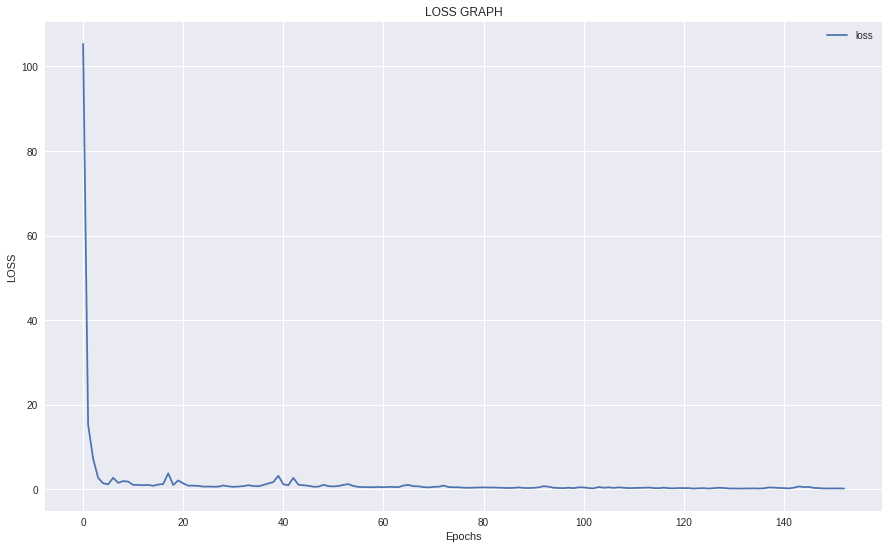

In [ ]:
plt.figure(figsize = (15,9))
plt.plot(trained_model.history["loss"], label = "loss")
plt.title("LOSS GRAPH")
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend()
plt.show()

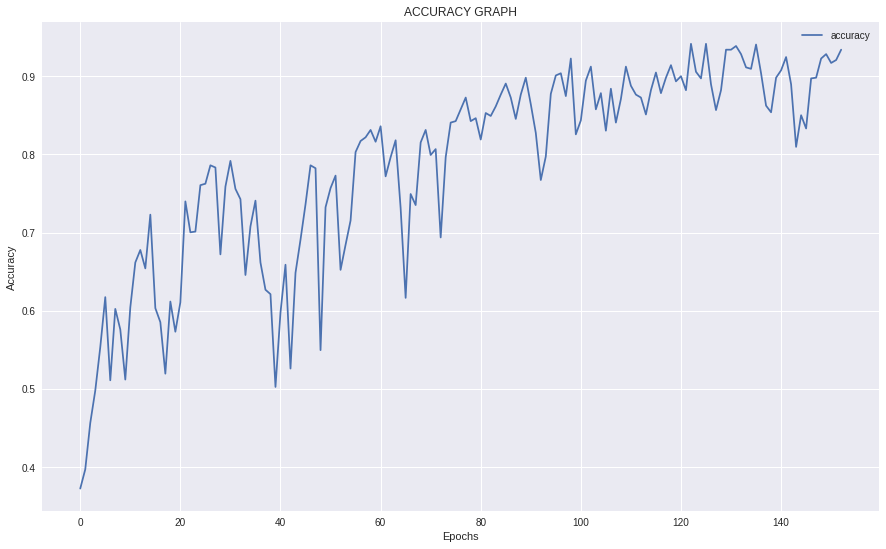

In [ ]:
plt.figure(figsize = (15,9))
plt.plot(trained_model.history["accuracy"], label = "accuracy")
plt.title("ACCURACY GRAPH")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Testing of the Best saved model

In [ ]:
#evaluating the model
from tensorflow import keras
best_model=keras.models.load_model("best_model.h5")
score = best_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 5ms/step - loss: 0.2335 - accuracy: 0.9211


In [ ]:
#checking the score of loss and accuracy
score

[0.23345428705215454, 0.9210526347160339]

In [ ]:
best_model.metrics_names

['loss', 'accuracy']

In [ ]:
predictions = np.argmax(best_model.predict(X_test), axis=-1)


In [ ]:
#checking the predictions
for i in predictions:
    print(i)

0
0
5
3
0
0
4
1
0
0
2
3
1
4
0
0
3
4
0
1
0
3
0
3
4
0
0
0
2
2
0
3
3
0
0
3
1
0
0
0
0
1
0
0
2
5
0
3
0
0
3
3
2
1
1
0
0
0
3
2
0
0
3
5
3
0
3
0
3
3
0
0
2
3
4
0
0
3
5
0
0
3
0
1
1
0
0
1
0
0
1
0
4
3
1
2
3
2
0
3
3
0
0
0
3
4
2
0
3
2
0
3
3
3
2
0
3
0
0
0
4
0
0
0
1
0
0
0
3
0
0
1
4
0
5
0
0
0
0
0
0
3
0
1
0
1
0
0
4
0
5
0
0
2
3
3
0
0
2
0
4
2
3
0
0
0
0
3
3
4
0
1
3
3
0
0
0
0
1
0
0
0
5
3
3
0
3
0
2
3
3
0
3
0
4
1
1
4
0
0
2
0
0
0
0
3
3
0
3
0
5
5
1
0
1
4
0
2
0
0
2
0
1
2
0
0
0
1
4
0
0
3
0
0
3
0
0
0
5
3
0
0
0
5
3
3
2
1
2
5
0
2
4
4
0
5
3
0
2
3
0
0
0
0
3
0


In [ ]:
from sklearn.metrics import confusion_matrix ,classification_report

In [ ]:
cm=confusion_matrix(y_test,predictions)
cm

array([[123,   1,   3,   0,   0,   0],
       [  1,  19,   0,   0,   0,   0],
       [  4,   0,  19,   0,   0,   0],
       [  2,   1,   0,  56,   0,   3],
       [  0,   4,   0,   0,  18,   0],
       [  0,   0,   2,   0,   0,  10]])

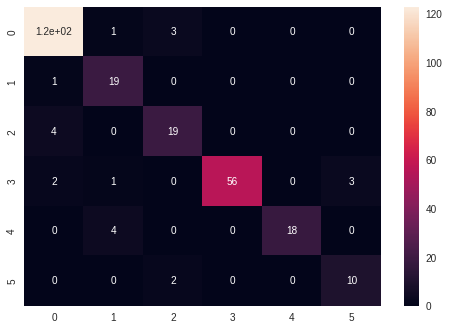

In [ ]:
#plot of the confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True)
   

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       127
           1       0.76      0.95      0.84        20
           2       0.79      0.83      0.81        23
           3       1.00      0.90      0.95        62
           4       1.00      0.82      0.90        22
           5       0.77      0.83      0.80        12

    accuracy                           0.92       266
   macro avg       0.88      0.88      0.88       266
weighted avg       0.93      0.92      0.92       266

